In [71]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

In [72]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

In [73]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)

In [74]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image and pre-process so that all "standard" images are the same size  
    standard_im = np.copy(image)
    standard_im = cv2.resize(standard_im,(32,32))
    return standard_im

In [75]:
def one_hot_encode(label):
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    if label == "red":
        one_hot_encoded = [1, 0, 0]
    elif label == "green":
        one_hot_encoded = [0, 0, 1]
    else:
        one_hot_encoded = [0, 1, 0]
    return one_hot_encoded

In [76]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)

**<span style="color: green;">TEST PASSED</span>**

In [77]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

In [79]:
def estimate_label(rgb_image):
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    v = hsv_image[:, :, 2]
    
    red_region = v[5:12, 6:24]
    yellow_region = v[13:20, 6:24]
    green_region = v[18:32, 6:24]
    
    avg_red = np.average(red_region)
    avg_yellow = np.average(yellow_region)
    avg_green = np.average(green_region)
    avg = [avg_red, avg_yellow, avg_green]
    
    if np.argmax(avg) == 0:
        predicted_label = [1, 0, 0]
    elif np.argmax(avg) == 1:
        predicted_label = [0, 1, 0]
    else:
        predicted_label = [0, 0, 1]
        
    return predicted_label

In [80]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [81]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.9797979797979798
Number of misclassified images = 6 out of 297


[0, 0, 1]
[1, 0, 0]


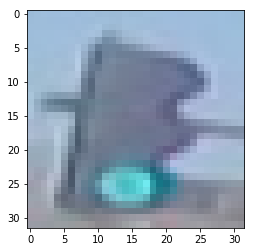

In [82]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as
x = 5
plt.imshow(MISCLASSIFIED[x][0])
print(MISCLASSIFIED[x][2])
print(MISCLASSIFIED[x][1])

In [83]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")

**<span style="color: green;">TEST PASSED</span>**